# Original Mango testing on the classifiers with parallel Tuner

In [1]:
import numpy as np
import random

In [2]:
from scipy.stats import uniform

In [3]:
conf_Dict = dict()
conf_Dict['batch_size'] = 3
conf_Dict['initial_random'] = 2
conf_Dict['num_iteration'] = 40

In [4]:
from scipy.stats import uniform

param_space1 = dict(x=uniform(-10, 22))

def objective_1(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*x*x
        results.append(x)
        
    return results

In [5]:
from scipy.stats import uniform

param_space2 = dict(x=uniform(-10, 47))

def objective_2(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*x
        results.append(x)
        
    return results

In [6]:
from scipy.stats import uniform

param_space3 = dict(x=uniform(-10, 47))


def objective_3(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = 30*abs(x)
        results.append(x)
        
    return results

In [7]:
from scipy.stats import uniform
import math

param_space4 = dict(x=uniform(-1500, 1500))


def objective_4(args_list):
    
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        
        x = x*math.sin(x/1500.0)
        results.append(x)
        
    return results

# Do the several experiments

In [8]:
all_results = []

In [9]:
all_seeds =[i for i in range(5)]

from mango import Tuner

for seed in all_seeds:
    
    print("seed is:",seed)
    np.random.seed(seed)
    random.seed(seed)
    tuner_1 = Tuner(param_space1, objective_1, conf_Dict)
    tuner_1.seed = seed
    
    np.random.seed(seed)
    random.seed(seed)
    tuner_2 = Tuner(param_space2, objective_2, conf_Dict)
    tuner_2.seed = seed
    
    np.random.seed(seed)
    random.seed(seed)
    tuner_3 = Tuner(param_space3, objective_3, conf_Dict)
    tuner_3.seed = seed
    
    np.random.seed(seed)
    random.seed(seed)
    tuner_4 = Tuner(param_space4, objective_4, conf_Dict)
    tuner_4.seed = seed
       
    
    results_1 = tuner_1.maximize()
    results_2 = tuner_2.maximize()
    results_3 = tuner_3.maximize()
    results_4 = tuner_4.maximize()
        
    all_results.append([results_1, results_2, results_3, results_4])
    
    

# Save the raw results

In [113]:
import pickle

with open('data/functions_tuner_raw_parallel.pickle', 'wb') as f:
    pickle.dump(all_results, f)

In [114]:
# Load the data

import pickle
with open('data/functions_tuner_raw_parallel.pickle', 'rb') as f:
    all_results = pickle.load(f)

# Plot the variation of several seeds

In [115]:
y_1 = []
y_2 = []
y_3 = []
y_4 = []
 
for res in all_results:
    results_1, results_2, results_3, results_4 = res
    
    results_obj_1 = np.array(results_1['objective_values'])

    y_max_1=[]
    for i in range(0, results_obj_1.shape[0], 3):
        y_max_1.append(np.max(results_obj_1[:i+2]))


    results_obj_2= np.array(results_2['objective_values'])

    y_max_2=[]
    for i in range(0, results_obj_2.shape[0], 3):
        y_max_2.append(np.max(results_obj_2[:i+2]))



    results_obj_3= np.array(results_3['objective_values'])

    y_max_3=[]
    for i in range(0, results_obj_3.shape[0], 3):
        y_max_3.append(np.max(results_obj_3[:i+2]))



    results_obj_4 = np.array(results_4['objective_values'])

    y_max_4=[]
    for i in range(0, results_obj_4.shape[0], 3):
        y_max_4.append(np.max(results_obj_4[:i+2]))
        
    
    
    y_1.append(y_max_1)
    y_2.append(y_max_2)
    y_3.append(y_max_3)
    y_4.append(y_max_4)
    
    

In [116]:
y_1 = np.array(y_1)
y_2 = np.array(y_2)
y_3 = np.array(y_3)
y_4 = np.array(y_4)

In [117]:
#np.max(y_xgboost,axis = 0)

In [118]:
#np.min(y_xgboost,axis = 0)

In [119]:
avg_y_1 = np.mean(y_1,axis = 0)
min_y_1 = np.min(y_1,axis = 0)
max_y_1 = np.max(y_1,axis = 0)

avg_y_2 = np.mean(y_2,axis = 0)
min_y_2 = np.min(y_2,axis = 0)
max_y_2 = np.max(y_2,axis = 0)

avg_y_3 = np.mean(y_3,axis = 0)
min_y_3 = np.min(y_3,axis = 0)
max_y_3 = np.max(y_3,axis = 0)

avg_y_4 = np.mean(y_4,axis = 0)
min_y_4 = np.min(y_4,axis = 0)
max_y_4 = np.max(y_4,axis = 0)

In [120]:
avg_y_3.shape

(41,)

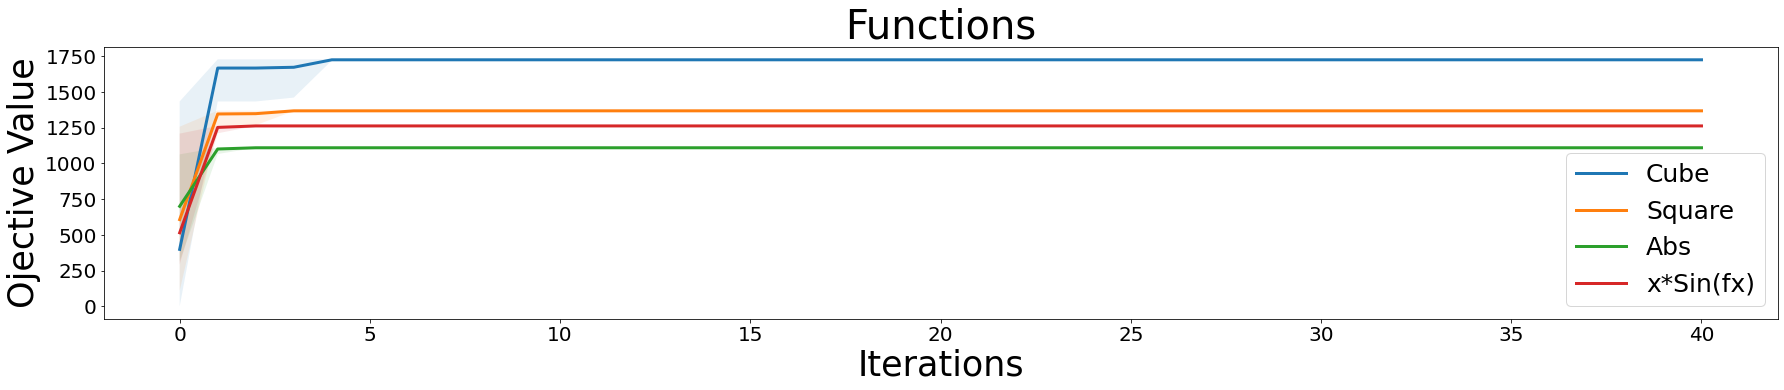

In [121]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Functions',fontsize=40)

labels = ['Cube', 'Square', 'Abs', 'x*Sin(fx)']

plt.plot(avg_y_1, linewidth=3, label= labels[0])
plt.plot(avg_y_2, linewidth=3, label= labels[1])
plt.plot(avg_y_3, linewidth=3, label= labels[2])
plt.plot(avg_y_4, linewidth=3, label= labels[3])



Time = [i for i in range(avg_y_1.shape[0])]

plt.fill_between(Time, min_y_1, max_y_1, alpha=0.1)
plt.fill_between(Time, min_y_2, max_y_2, alpha=0.1)
plt.fill_between(Time, min_y_3, max_y_3, alpha=0.1)
plt.fill_between(Time, min_y_4, max_y_4, alpha=0.1)


plt.xlabel('Iterations', fontsize=35)
plt.ylabel('Ojective Value',fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 25})
plt.show()


# Plot the Mango max variation

In [122]:
# Collect max of every run

y_1 = []
y_2 = []
y_3 = []
y_4 = []

all_results_variation = []


 
for res in all_results:
    results_1, results_2, results_3, results_4 = res
    
    results_obj_1 = np.array(results_1['objective_values'])

    y_max_1=[]
    for i in range(0, results_obj_1.shape[0], 3):
        y_max_1.append(np.max(results_obj_1[:i+2]))


    results_obj_2= np.array(results_2['objective_values'])

    y_max_2=[]
    for i in range(0, results_obj_2.shape[0], 3):
        y_max_2.append(np.max(results_obj_2[:i+2]))


    results_obj_3= np.array(results_3['objective_values'])

    y_max_3=[]
    for i in range(0, results_obj_3.shape[0], 3):
        y_max_3.append(np.max(results_obj_3[:i+2]))



    results_obj_4 = np.array(results_4['objective_values'])

    y_max_4=[]
    for i in range(0, results_obj_4.shape[0], 3):
        y_max_4.append(np.max(results_obj_4[:i+2]))
        
    results = [results_obj_1, results_obj_2, results_obj_3, results_obj_4]

    results = np.array(results)
    
    results_variation = []
    configs = []

    for i in range(0, results.shape[1], 3):
        max_val = np.max(results[:,:(i+2)])
        results_variation.append(max_val)
        configs.append((i)*results.shape[0])
    
    all_results_variation.append(results_variation)

In [123]:
all_results_variation = np.array(all_results_variation)
print(all_results_variation.shape)

(5, 41)


In [124]:
avg_tuner = np.mean(all_results_variation,axis = 0)
min_tuner = np.min(all_results_variation,axis = 0)
max_tuner = np.max(all_results_variation,axis = 0)

In [125]:
avg_tuner.shape

(41,)

In [126]:
#configs

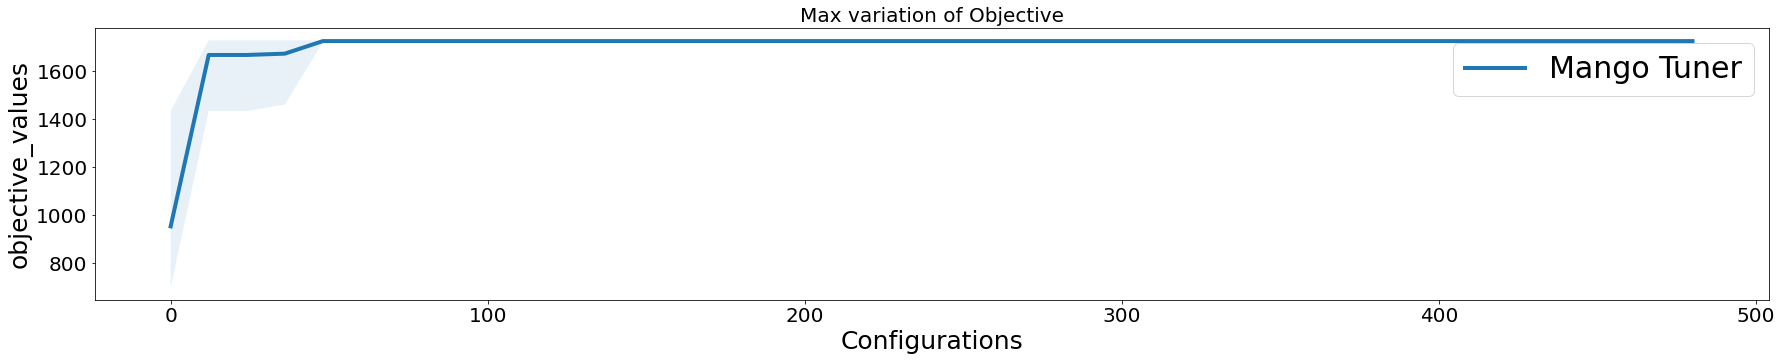

In [127]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)


plt.plot(configs, avg_tuner,lw=4,label='Mango Tuner')


plt.fill_between(configs, min_tuner, max_tuner, alpha=0.1)

plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Comparisons of Tuner with MetaTuner

# Serial Mango

In [187]:
# Tuner results
# Load the data

with open('data/functions_tuner_raw.pickle', 'rb') as f:
    all_results = pickle.load(f)
    
# Collect max of every run

y_1 = []
y_2 = []
y_3 = []
y_4 = []

all_results_variation = []


 
for res in all_results:
    results_1, results_2, results_3, results_4 = res
    
    results_obj_1 = np.array(results_1['objective_values'])

    y_max_1=[]
    for i in range(results_obj_1.shape[0]):
        y_max_1.append(np.max(results_obj_1[:i+2]))


    results_obj_2= np.array(results_2['objective_values'])

    y_max_2=[]
    for i in range(results_obj_2.shape[0]):
        y_max_2.append(np.max(results_obj_2[:i+2]))



    results_obj_3= np.array(results_3['objective_values'])

    y_max_3=[]
    for i in range(results_obj_3.shape[0]):
        y_max_3.append(np.max(results_obj_3[:i+2]))



    results_obj_4 = np.array(results_4['objective_values'])

    y_max_4=[]
    for i in range(results_obj_4.shape[0]):
        y_max_4.append(np.max(results_obj_4[:i+2]))
        
    results = [results_obj_1, results_obj_2, results_obj_3, results_obj_4]

    results = np.array(results)
    
    results_variation = []
    configs = []

    for i in range(0, results.shape[1], 1):
        max_val = np.max(results[:,:(i+2)])
        results_variation.append(max_val)
        configs.append((i)*results.shape[0])
    
    all_results_variation.append(results_variation)
    

In [188]:
configs_tuner = configs

In [189]:
all_results_variation = np.array(all_results_variation)
print(all_results_variation.shape)
avg_tuner = np.mean(all_results_variation,axis = 0)
min_tuner = np.min(all_results_variation,axis = 0)
max_tuner = np.max(all_results_variation,axis = 0)

(10, 42)


# Parallel Tuner

In [190]:
# Tuner results
# Load the data

with open('data/functions_tuner_raw_parallel.pickle', 'rb') as f:
    all_results = pickle.load(f)
    
# Collect max of every run

y_1 = []
y_2 = []
y_3 = []
y_4 = []

all_results_variation = []


 
for res in all_results:
    results_1, results_2, results_3, results_4 = res
    
    results_obj_1 = np.array(results_1['objective_values'])

    y_max_1=[]
    for i in range(results_obj_1.shape[0]):
        y_max_1.append(np.max(results_obj_1[:i+2]))


    results_obj_2= np.array(results_2['objective_values'])

    y_max_2=[]
    for i in range(results_obj_2.shape[0]):
        y_max_2.append(np.max(results_obj_2[:i+2]))



    results_obj_3= np.array(results_3['objective_values'])

    y_max_3=[]
    for i in range(results_obj_3.shape[0]):
        y_max_3.append(np.max(results_obj_3[:i+2]))



    results_obj_4 = np.array(results_4['objective_values'])

    y_max_4=[]
    for i in range(results_obj_4.shape[0]):
        y_max_4.append(np.max(results_obj_4[:i+2]))
        
    results = [results_obj_1, results_obj_2, results_obj_3, results_obj_4]

    results = np.array(results)
    
    results_variation = []
    configs = []

    for i in range(0, results.shape[1], 3):
        max_val = np.max(results[:,:(i+2)])
        results_variation.append(max_val)
        configs.append((i/3.0)*results.shape[0])
    
    all_results_variation.append(results_variation)
    

In [191]:
configs_tuner_parallel = configs

In [192]:
all_results_variation = np.array(all_results_variation)
print(all_results_variation.shape)
avg_tuner_parallel = np.mean(all_results_variation,axis = 0)
min_tuner_parallel = np.min(all_results_variation,axis = 0)
max_tuner_parallel = np.max(all_results_variation,axis = 0)


(5, 41)


In [193]:
# Meta Tuner data and results

# Load the data

with open('data/MetaTuner_functions_serial.pickle', 'rb') as f:
    objective_values = pickle.load(f)
    
objective_values = np.array(objective_values)

results_variation = []

for j in range(objective_values.shape[0]):
    values = []
    for i in range(objective_values.shape[1]-10):
        val = np.max(objective_values[j,:(i+10)])
        #print(j,i,val)
        values.append(val)
    
    results_variation.append(values)


all_results_variation = np.array(results_variation)

print(all_results_variation.shape)

avg_metatuner = np.mean(all_results_variation,axis = 0)
min_metatuner = np.min(all_results_variation,axis = 0)
max_metatuner = np.max(all_results_variation,axis = 0)

print(avg_metatuner.shape)

(3, 98)
(98,)


# MetaTuner Parallel

In [200]:
# Meta Tuner data and results

# Load the data

with open('data/MetaTuner_functions_parallel.pickle', 'rb') as f:
    objective_values = pickle.load(f)
    
objective_values = np.array(objective_values)

results_variation = []

for j in range(objective_values.shape[0]):
    values = []
    for i in range(0, objective_values.shape[1]-10, 3):
        val = np.max(objective_values[j,:(i+10)])
        #print(j,i,val)
        values.append(val)
    
    results_variation.append(values)


all_results_variation = np.array(results_variation)

print(all_results_variation.shape)

avg_metatuner_parallel = np.mean(all_results_variation,axis = 0)
min_metatuner_parallel = np.min(all_results_variation,axis = 0)
max_metatuner_parallel = np.max(all_results_variation,axis = 0)

print(avg_metatuner_parallel.shape)

(3, 80)
(80,)


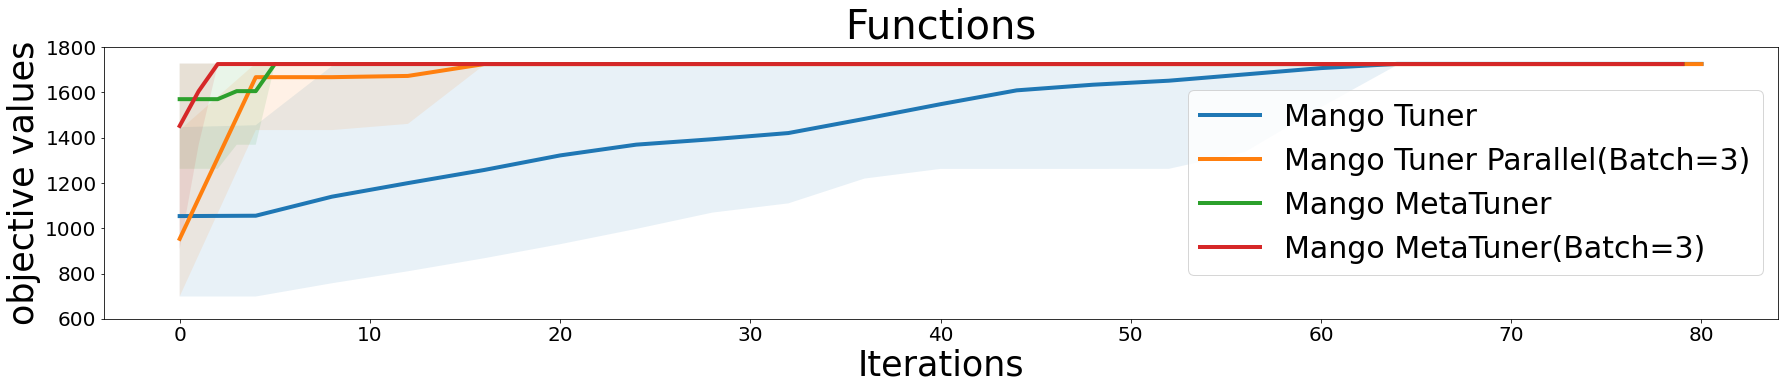

In [203]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Functions',fontsize=40)

plt.plot(configs_tuner[:21], avg_tuner[:21],lw=4,label='Mango Tuner')
plt.plot(configs_tuner_parallel[:21], avg_tuner_parallel[:21],lw=4,label='Mango Tuner Parallel(Batch=3)')

configs_metatuner = [i for i in range(all_results_variation.shape[1])]
plt.plot(configs_metatuner[:80], avg_metatuner[:80],lw=4,label='Mango MetaTuner')
plt.plot(configs_metatuner[:80], avg_metatuner_parallel[:80],lw=4,label='Mango MetaTuner(Batch=3)')




plt.fill_between(configs_tuner[:21], min_tuner[:21], max_tuner[:21], alpha=0.1)
plt.fill_between(configs_tuner_parallel[:21], min_tuner_parallel[:21], max_tuner_parallel[:21], alpha=0.1)
plt.fill_between(configs_metatuner[:80], min_metatuner[:80], max_metatuner[:80], alpha=0.1)
plt.fill_between(configs_metatuner[:80], min_metatuner_parallel[:80], max_metatuner_parallel[:80], alpha=0.1)




plt.xlabel('Iterations', fontsize=35)
plt.ylabel('objective values',fontsize=35)

#xticks_labels = 

plt.xticks(fontsize=20)
plt.yticks([600, 800, 1000, 1200, 1400, 1600, 1800],fontsize=20)
plt.legend(loc='right',prop={'size': 30})
plt.show()